In [1]:
using DataFrames
using Requests
using TimeSeries
using MarketTechnicals
using PyPlot

  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:6
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:6
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
    write(GZip.GZipStream, Array{#T<:Any, N<:Any}) at /home/juser/.julia/v0.5/GZip/src/GZip.jl:456
is ambiguous with: 
    write(Base.IO, Array{UInt8, N<:Any}) at io.jl:154.
To fix, define 
    write(GZip.GZipStream, Array{UInt8, N<:Any})
before the new definition.
./error.jl:26
 [inlined code] from  in ./error.jldepwarn:(26
:: in ASCIIStringdepwarn, (::Symbol)::ASCIIS

In [2]:
function getcsv(url)
    # without error checking
    df = readtable(Requests.get_streaming(url))
end
function csvtotimearray(url)
    df = getcsv(url)
    timestamp = Date[Date(i) for i in df[1]] # parse dates
    colnames=AbstractString[string(i) for i in DataFrames.names(df)]
    dataarray=convert(Array, df[2:end])
    TimeArray(timestamp,dataarray,colnames[2:end])
end
# function csvtotimearray_adjustclose(url)
#     df = getcsv(url)
#     timestamp = Date[Date(i) for i in df[1]] # parse dates
#     colnames=AbstractString[string(i) for i in DataFrames.names(df)]
#     dataarray=convert(Array, df[[2,3,4,7,6]])
#     TimeArray(timestamp,dataarray,colnames[2:end-1])
# end
function yahoo(symbol, startdate)
    str="a=$(Dates.month(startdate)-1)"*Dates.format(startdate, "&b=dd&c=yyyy")
    url="http://real-chart.finance.yahoo.com/table.csv?s="*symbol*"&"*str*"&g=d&ignore=.csv"
    csvtotimearray(url)
end
function quandl(symbol, startdate)
    str=Dates.format(startdate, "yyyy-mm-dd")
    url="https://www.quandl.com/api/v3/datasets/$symbol.csv?api_key=VKyXNok9WfyAwAHtZBCR&start_date=$str"
    csvtotimearray(url)
end

 in include_string(::ASCIIString, ::ASCIIString) at ./loading.jl:371
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.5/IJulia/src/execute_request.jl:177
 [inlined code] from ./dict.jl:779
 in eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.5/IJulia/src/IJulia.jl:141
 in (::IJulia.##24#30)() at ./task.jl:308
while loading /home/juser/.julia/v0.5/TimeSeries/src/apply.jl, in expression starting on line 105
 [inlined code] from ./error.jl:26
 in depwarn(::ASCIIString, ::Symbol) at ./deprecated.jl:64
 in Union(::Type{Int64}, ::Type{Float64}) at ./deprecated.jl:50
 [inlined code] from /home/juser/.julia/v0.5/TimeSeries/src/TimeSeries.jl:7
 in anonymous at ./<no file>:4294967295
 in include(::ASCIIString) at ./boot.jl:240
 in include_from_node1(::ASCIIString) at ./loading.jl:417
 in include(::ASCIIString) at ./boot.jl:240
 in include_from_node1(::ASCIIString) at ./loading.jl:417
 in eval(::Module, ::Any) at ./boot.jl:243
 [inlined code] fro

quandl (generic function with 1 method)

In [3]:
startdate=Date(2008,6,3) # CBOE/GVZ is available from 2008,6,3
symbol="QQQ"
ohlcv=yahoo(symbol, startdate)

  likely near In[3]:3
  likely near In[3]:3
  likely near In[3]:3
  likely near In[3]:3
  likely near In[3]:3
  likely near In[3]:3
  likely near In[3]:3
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl
  likely near In[3]:3
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl


1997x6 TimeSeries.TimeArray{Real,2,DataType} 2008-06-03 to 2016-05-06

             Open      High      Low       Close     Volume          Adj_Close  
2008-06-03 | 49.59     49.9      48.67     49.13     167606900       45.3899    
2008-06-04 | 48.98     50.1      48.94     49.76     174870800       45.9719    
2008-06-05 | 49.89     50.61     49.7      50.55     126653700       46.7018    
2008-06-06 | 50.11     50.21     49.02     49.03     189136000       45.2975    
⋮
2016-05-03 | 105.96    106.44    105.45    105.73    36351400        105.73     
2016-05-04 | 105.12    105.48    104.79    105.05    26689000        105.05     
2016-05-05 | 105.43    105.66    104.81    105.02    20724800        105.02     
2016-05-06 | 104.5     105.6     104.4     105.58    29731500        105.58     


  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl
  likely near /opt/julia_packages/.julia/v0.5/IJulia/src/kernel.jl:31
in gc_protect_handle at /opt/julia_packages/.julia/v0.5/ZMQ/src/ZMQ.jl


In [4]:
ta=ohlcv["Close"]
vix=quandl("CBOE/VIX", startdate)
vixarray=TimeArray(vix.timestamp,vix.values[:,end],["CBOE/VIX"])

  likely near In[4]:2
  likely near In[4]:2
  likely near In[4]:2
  likely near In[4]:2
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl
  likely near In[4]:2
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl
  likely near In[4]:3
  likely near In[4]:3
  likely near In[4]:3
  likely near In[4]:3
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl
  likely near In[4]:3
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl


1996x1 TimeSeries.TimeArray{Float64,1,DataType} 2008-06-03 to 2016-05-05

             CBOE/VIX  
2008-06-03 | 20.24     
2008-06-04 | 20.8      
2008-06-05 | 18.63     
2008-06-06 | 23.56     
⋮
2016-05-02 | 14.68     
2016-05-03 | 15.6      
2016-05-04 | 16.05     
2016-05-05 | 15.91     


In [5]:
vxn=quandl("CBOE/VXN", startdate)
vxnarray=TimeArray(vxn.timestamp,vxn.values[:,end],["CBOE/VXN"])

1996x1 TimeSeries.TimeArray{Float64,1,DataType} 2008-06-03 to 2016-05-05

             CBOE/VXN  
2008-06-03 | 23.89     
2008-06-04 | 24.01     
2008-06-05 | 22.85     
2008-06-06 | 26.04     
⋮
2016-05-02 | 18.28     
2016-05-03 | 19.02     
2016-05-04 | 19.32     
2016-05-05 | 19.14     


In [6]:
ovxarray=quandl("CBOE/OVX", startdate)

1997x1 TimeSeries.TimeArray{Float64,2,DataType} 2008-06-03 to 2016-05-05

             USO_VIX_OVX_  
2008-06-03 | 41.75         
2008-06-04 | 40.77         
2008-06-05 | 41.37         
2008-06-06 | 52.03         
⋮
2016-05-02 | 45.15         
2016-05-03 | 45.78         
2016-05-04 | 44.76         
2016-05-05 | 44.82         


In [7]:
gvzarray=quandl("CBOE/GVZ", startdate)

1997x1 TimeSeries.TimeArray{Float64,2,DataType} 2008-06-03 to 2016-05-05

             GVZ      
2008-06-03 | 22.89    
2008-06-04 | 22.69    
2008-06-05 | 22.78    
2008-06-06 | 23.6     
⋮
2016-05-02 | 19.29    
2016-05-03 | 18.7     
2016-05-04 | 19.47    
2016-05-05 | 18.46    


In [8]:
evzarray=quandl("CBOE/EVZ", startdate)

1997x1 TimeSeries.TimeArray{Float64,2,DataType} 2008-06-03 to 2016-05-05

             EVZ      
2008-06-03 | 9.98     
2008-06-04 | 9.92     
2008-06-05 | 10.0     
2008-06-06 | 10.08    
⋮
2016-05-02 | 9.92     
2016-05-03 | 10.14    
2016-05-04 | 10.15    
2016-05-05 | 10.2     


In [9]:
ustreasuryarray=quandl("USTREASURY/REALLONGTERM", startdate)

1985x1 TimeSeries.TimeArray{Float64,2,DataType} 2008-06-03 to 2016-05-06

             LT_Real_Average_10Yrs_  
2008-06-03 | 2.12                    
2008-06-04 | 2.21                    
2008-06-05 | 2.27                    
2008-06-06 | 2.14                    
⋮
2016-05-03 | 0.67                    
2016-05-04 | 0.66                    
2016-05-05 | 0.62                    
2016-05-06 | 0.66                    


In [10]:
oil=quandl("EOD/OIL", startdate)
oilarray=TimeArray(oil.timestamp,oil.values[:,end-1],["oil"])

1997x1 TimeSeries.TimeArray{Float64,1,DataType} 2008-06-03 to 2016-05-06

             oil      
2008-06-03 | 74.51    
2008-06-04 | 73.1432  
2008-06-05 | 76.82    
2008-06-06 | 82.9469  
⋮
2016-05-03 | 5.67     
2016-05-04 | 5.7      
2016-05-05 | 5.77     
2016-05-06 | 5.8      


In [11]:
gold=quandl("WGC/GOLD_DAILY_USD", startdate)
goldarray=TimeArray(gold.timestamp,gold.values./gold.values[1],["gold"])

  likely near In[11]:2
  likely near In[11]:2
  likely near In[11]:2
  likely near In[11]:2
  likely near In[11]:2
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl


2069x1 TimeSeries.TimeArray{Float64,2,DataType} 2008-06-03 to 2016-05-06

             gold    
2008-06-03 | 1.0     
2008-06-04 | 1.0048  
2008-06-05 | 0.9994  
2008-06-06 | 1.0128  
⋮
2016-05-03 | 1.4717  
2016-05-04 | 1.4592  
2016-05-05 | 1.4561  
2016-05-06 | 1.466   


In [12]:
predictcount=252;
rangelength=28;

In [13]:
function volumeoscillator(ohlcv, n=28, c="Volume")
    volume=ohlcv[c]
    vshort=ema(volume, Int(n/2))
    vlong=ema(volume, n)
    volumeoscillator=(vshort.-vlong)./vlong
    TimeArray(volumeoscillator.timestamp,volumeoscillator.values,["VolumeOscillator$n"])
end
# function volumeoscillator_all(ohlcv, n=28)
#     v0=volumeoscillator(ohlcv, Int(n/2))
#     v1=volumeoscillator(ohlcv, n)
#     v2=volumeoscillator(ohlcv, n*2)
#     r=merge2(v0,v1)
#     merge2(r,v2)
# end

volumeoscillator (generic function with 3 methods)

In [14]:
function chaikinmoneyflow(ohlcv, n=21, h="High", l="Low", c="Close", v="Volume")
    high=ohlcv[h]
    low=ohlcv[l]
    clo=ohlcv[c]
    volume=ohlcv[v]
    moneyflowvolume = (2.*clo.-low.-high)./(high.-low).*volume
    moneyflowsum=moving(moneyflowvolume,sum,n)
    volumesum=moving(volume,sum,n)
    re=moneyflowsum./volumesum
    TimeArray(re.timestamp, re.values, ["cmf$n"], ohlcv.meta)
end

chaikinmoneyflow (generic function with 6 methods)

In [15]:
function overlaps(t1::Vector, t2::Vector)
    i = j = 1
    idx1 = Int[]
    idx2 = Int[]
    while i <= length(t1) && j <= length(t2)
        if t1[i] > t2[j]
            j += 1
        elseif t1[i] < t2[j]
            i += 1
        else
            push!(idx1, i)
            push!(idx2, j)
            i += 1
            j += 1
        end
    end
    (idx1, idx2)        
end

overlaps (generic function with 1 method)

In [16]:
function merge2(ta1, ta2)
    idx1, idx2 = overlaps(ta1.timestamp, ta2.timestamp)
    vals = [ta1[idx1].values ta2[idx2].values]
    TimeArray(ta1[idx1].timestamp, vals, [ta1.colnames; ta2.colnames])
end

merge2 (generic function with 1 method)

In [17]:
function bollingerbands2{T,N}(ta::TimeArray{T,N}, ma::Int, width::Real)
    tama   = sma(ta, ma)
    upband = tama .+ moving(ta, std, ma) .* width .* sqrt((ma-1)/ma) # take out Bessel correction, per algorithm
    dnband = tama .- moving(ta, std, ma) .* width .* sqrt((ma-1)/ma)
    bands  =  merge(upband, dnband) 
    merge(bands, tama, col_names = ["up", "down", "mean"])
end
function bollingerbands_deviation(ta, n=20, width=2)
    bbands=bollingerbands2(ta,n,width)
    bbprice=merge2(bbands,ta)
    bbstd=(bbands.values[:,1].-bbands.values[:,3])./2
    bbdev=(bbprice.values[:,4].-bbands.values[:,3])./(bbands.values[:,1].-bbands.values[:,3])
    TimeArray(bbands.timestamp, [bbdev bbstd], ["bbdev$n,$width", "bbstd$n,$width"])
end

bollingerbands_deviation (generic function with 3 methods)

In [18]:
function vwap_divergence(ohlcv, n=28)
    v1=vwap(ohlcv, Int(n/2))
    v2=vwap(ohlcv, n)
    v3=vwap(ohlcv, n*2)
    d1=v1.-v2
    d2=v2.-v3
    ta=merge2(v1,v2)
    ta=merge2(ta,v3)
    ta=merge2(ta,d1)
    ta=merge2(ta,d2)
    cname=["vwap$(Int(n/2))","vwap$n","vwap$(n*2)","vwap$(Int(n/2))-$n","vwap$n-$(n*2)"]
    TimeArray(ta.timestamp,ta.values,cname)
end

vwap_divergence (generic function with 2 methods)

In [19]:
function averagetruerange(ohlc, n=14, h="High", l="Low", c="Close")
    highs = merge(ohlc[h], lag(ohlc[c]))
    lows = merge(ohlc[l], lag(ohlc[c]))
    hi=convert(Array{Real,1},[maximum(highs.values[i,:]) for i=1:size(highs.values)[1]])
    lo=convert(Array{Real,1},[minimum(lows.values[i,:]) for i=1:size(lows.values)[1]])
    truehigh = TimeArray(highs.timestamp, hi, ["hi"], highs.meta)
    truelow  = TimeArray(lows.timestamp, lo, ["lo"], lows.meta)
    res = ema(truehigh .- truelow, n, wilder=true)
    TimeArray(res.timestamp, res.values, ["atr$n"], ohlc.meta)
end
function atr_divergence(ohlcv, n=28)
    v1=averagetruerange(ohlcv,Int(n/2));
    v2=averagetruerange(ohlcv,n);
    v3=averagetruerange(ohlcv,n*2);
    d1=v1.-v2
    d2=v2.-v3
    ta=merge2(v1,v2)
    ta=merge2(ta,v3)
    ta=merge2(ta,d1)
    ta=merge2(ta,d2)
    cname=["atr$(Int(n/2))","atr$n","atr$(n*2)","atr$(Int(n/2))-$n","atr$n-$(n*2)"]
    TimeArray(ta.timestamp,ta.values,cname)
end

atr_divergence (generic function with 2 methods)

In [20]:
function moneyflowindex(ohlcv, n=14, h="High", l="Low", c="Close", v="Volume")
    hi=ohlcv[h]
    lo=ohlcv[l]
    cl=ohlcv[c]
    volume=ohlcv[v]
    typical=(hi.+lo.+cl)./3
    diff=typical.-lag(typical)
    positive=convert(Array{Real,1},[i[2][1]>0?i[2][1]:0 for i in diff])
    negative=convert(Array{Real,1},[i[2][1]<0?abs(i[2][1]):0 for i in diff])
    pflow=TimeArray(diff.timestamp,positive,["Positive"]).*volume
    nflow=TimeArray(diff.timestamp,negative,["Negative"]).*volume
    psum=moving(pflow,sum,n)
    nsum=moving(nflow,sum,n)
    flowsum=psum.+nsum
    re=psum./flowsum
    TimeArray(re.timestamp, re.values, ["mfi$n"], ohlcv.meta)
end
function rsi_mfi_divergence(rsi, mfi, n=14)
    signal=ema(mfi.-rsi,5)
    TimeArray(signal.timestamp,signal.values,["rsi_mfi_divergence"])
end
function rsi_mfi_all(ohlcv, n=28, c="Close")
    ta=ohlcv[c]
    n0=Int(n/2)
    r0=rsi(ta,n0)./100
    r1=rsi(ta,n)./100
    m0=moneyflowindex(ohlcv,n0)
    m1=moneyflowindex(ohlcv,n)
    re=merge2(r1,m1)
    re=merge2(re,r0)
    re=merge2(re,m0)
end

rsi_mfi_all (generic function with 3 methods)

In [21]:
function macd2(ta, fast=12, slow=26, signal=9)
    mcd = ema(ta, fast) .- ema(ta, slow)
    sig = ema(mcd, signal)
    r = merge(mcd, sig, col_names=["macd", "signal"])
#     merge(r, mcd .- sig, col_names=[r.colnames; ["histogram"]])
end

macd2 (generic function with 4 methods)

In [22]:
function priceindex(ta, n=28)
    high=moving(ta, maximum, n)
    low=moving(ta, minimum, n)
    lh=merge(low, high, col_names = ["min", "max"])
    lh2=lh
    for i=1:n-1
        lh2=lead(lh2)
    end
    ranges=merge2(ta,lh2)
    index=[Real((i[2][1]-i[2][2])/(i[2][3]-i[2][2])) for i in ranges]
    TimeArray(ranges.timestamp, [ranges.values index], [ranges.colnames;["priceindex$n"]])
end

priceindex (generic function with 2 methods)

In [23]:
rsimfiarray=rsi_mfi_all(ohlcv, rangelength);

  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
  likely near In[23]:1
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl
  likely near In[23]:1
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl


In [24]:
vwaparray=vwap_divergence(ohlcv, rangelength);
atrarray=atr_divergence(ohlcv, rangelength);

  likely near In[24]:1
  likely near In[24]:1
  likely near In[24]:1
  likely near In[24]:1
  likely near In[24]:1
  likely near In[24]:1
  likely near In[24]:2
  likely near In[24]:2
  likely near In[24]:2
  likely near In[24]:2
  likely near In[24]:2
  likely near In[24]:2
  likely near In[24]:2


In [25]:
volumeoscillatorarray=volumeoscillator(ohlcv, rangelength);

In [26]:
macdarray=macd2(ta);

In [27]:
cmfarray=chaikinmoneyflow(ohlcv);
bbarray=bollingerbands_deviation(ta);
priceindexarray=priceindex(ta, rangelength);

  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
  likely near In[27]:2
in Type at /home/juser/.julia/v0.5/TimeSeries/src/timearray.jl


In [28]:
featurearray=merge2(bbarray,cmfarray)
featurearray=merge2(featurearray,macdarray);
featurearray=merge2(featurearray,volumeoscillatorarray);
featurearray=merge2(featurearray,rsimfiarray);

In [29]:
featurearray=merge2(featurearray,atrarray);
featurearray=merge2(featurearray,vwaparray);
featurearray=merge2(featurearray,ustreasuryarray);
featurearray=merge2(featurearray,vixarray);
featurearray=merge2(featurearray,vxnarray);
featurearray=merge2(featurearray,goldarray);
featurearray=merge2(featurearray,gvzarray);
featurearray=merge2(featurearray,oilarray);
featurearray=merge2(featurearray,ovxarray);
featurearray=merge2(featurearray,evzarray);

In [30]:
withlabel=merge2(featurearray,priceindexarray)

1898x32 TimeSeries.TimeArray{Real,2,DataType} 2008-08-21 to 2016-03-30

             bbdev20,2  bbstd20,2  cmf21   macd    signal  VolumeOscillator28  rsi     mfi28   rsi     mfi14   atr14   atr28   atr56   atr14-28  atr28-56  vwap14    vwap28    vwap56    vwap14-28  vwap28-56  LT_Real_Average_10Yrs_  CBOE/VIX  CBOE/VXN  gold    GVZ      oil      USO_VIX_OVX_  EVZ      Close     min       max       priceindex28  
2008-08-21 | 0.1573     1.2159     0.0287  0.4003  0.3248  -0.041              0.5201  0.5959  0.48    0.6666  0.974   1.0321  1.0671  -0.0581   -0.0351   47.1007   45.9838   46.4392   1.1169     -0.4554    2.09                    19.82     23.15     0.948   29.47    72.4     45.14         10.99    46.87     37.82     47.49     0.9359        
2008-08-22 | 0.3712     1.201      0.0849  0.4046  0.3407  -0.0611             0.5625  0.6405  0.58    0.726   0.9623  1.0241  1.0626  -0.0618   -0.0384   47.2742   46.1375   46.3878   1.1367     -0.2503    2.11                    18.81  

In [31]:
withoutlabel=merge2(featurearray,ta)

1924x29 TimeSeries.TimeArray{Real,2,DataType} 2008-08-21 to 2016-05-05

             bbdev20,2  bbstd20,2  cmf21   macd    signal  VolumeOscillator28  rsi     mfi28   rsi     mfi14   atr14   atr28   atr56   atr14-28  atr28-56  vwap14    vwap28    vwap56    vwap14-28  vwap28-56  LT_Real_Average_10Yrs_  CBOE/VIX  CBOE/VXN  gold    GVZ      oil      USO_VIX_OVX_  EVZ      Close     
2008-08-21 | 0.1573     1.2159     0.0287  0.4003  0.3248  -0.041              0.5201  0.5959  0.48    0.6666  0.974   1.0321  1.0671  -0.0581   -0.0351   47.1007   45.9838   46.4392   1.1169     -0.4554    2.09                    19.82     23.15     0.948   29.47    72.4     45.14         10.99    46.87     
2008-08-22 | 0.3712     1.201      0.0849  0.4046  0.3407  -0.0611             0.5625  0.6405  0.58    0.726   0.9623  1.0241  1.0626  -0.0618   -0.0384   47.2742   46.1375   46.3878   1.1367     -0.2503    2.11                    18.81     22.38     0.9372  28.12    68.2     43.63         10.73    47.49 

In [32]:
dataoffset=length(withoutlabel)-length(withlabel)
lastdate=withlabel.timestamp[end]
lastdateidx=searchsortedfirst(withoutlabel.timestamp, lastdate)
splitidx=lastdateidx-predictcount+dataoffset
newfeatures=TimeArray(withoutlabel.timestamp[splitidx+1:end],withoutlabel.values[splitidx+1:end,:],withoutlabel.colnames);

In [33]:
training=TimeArray(withlabel.timestamp[1:splitidx],withlabel.values[1:splitidx,:],withlabel.colnames);

In [34]:
test=TimeArray(withlabel.timestamp[splitidx+1:end],withlabel.values[splitidx+1:end,:],withlabel.colnames);

In [35]:
rsiidx=findfirst(withlabel.colnames,"rsi")

7

In [36]:
mfiidx=findfirst(withlabel.colnames,"mfi$rangelength")

8

In [37]:
closeidx=findfirst(withlabel.colnames,"Close")

29

In [38]:
initvalue=withlabel.values[1,closeidx];

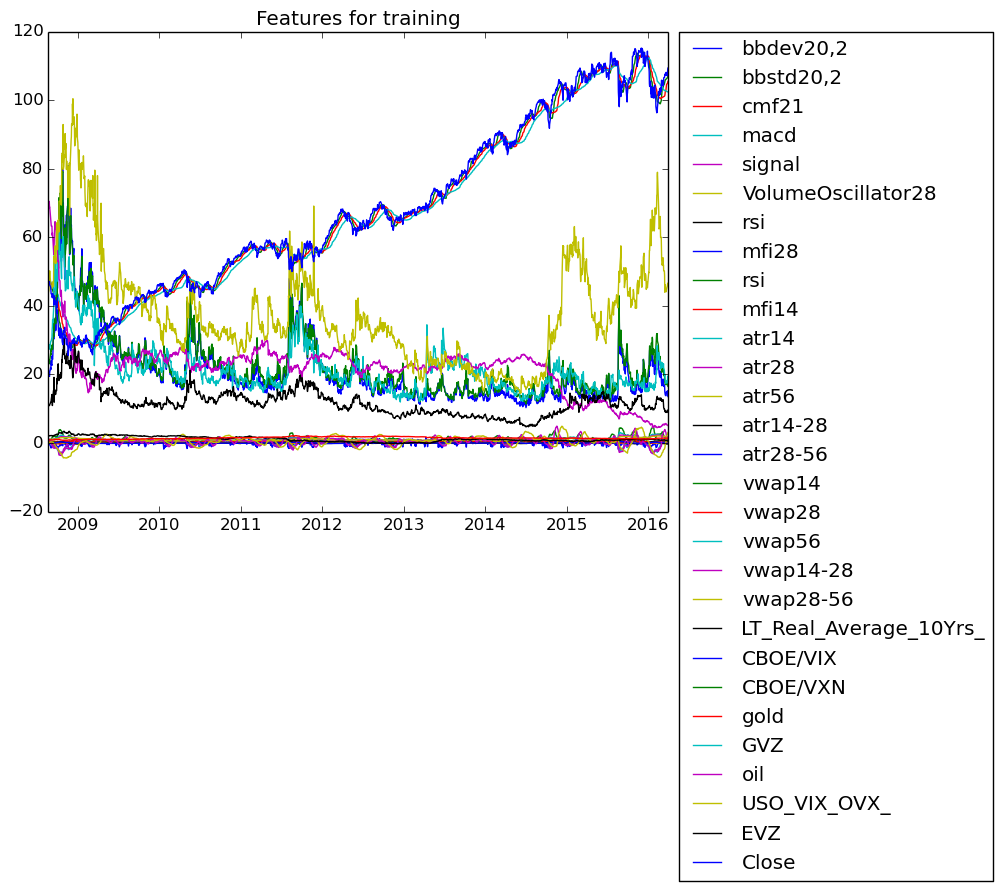

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [51]:
plot(withlabel.timestamp,withlabel.values[:,1:closeidx])
legend(withlabel.colnames[1:closeidx],bbox_to_anchor=(1.54, 1.02))
title("Features for training")

In [45]:
using DecisionTree
# using ScikitLearn
ntrees=100
pricerangeidx=closeidx+3
features=training.values[:,1:closeidx]
labels=convert(Array{Float64,1},training.values[:,pricerangeidx])
model = build_forest(labels,features, 2, ntrees, 5, 0.7)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 396.12
Avg Depth:  23.84

In [46]:
newlabels=apply_forest(model, newfeatures.values);

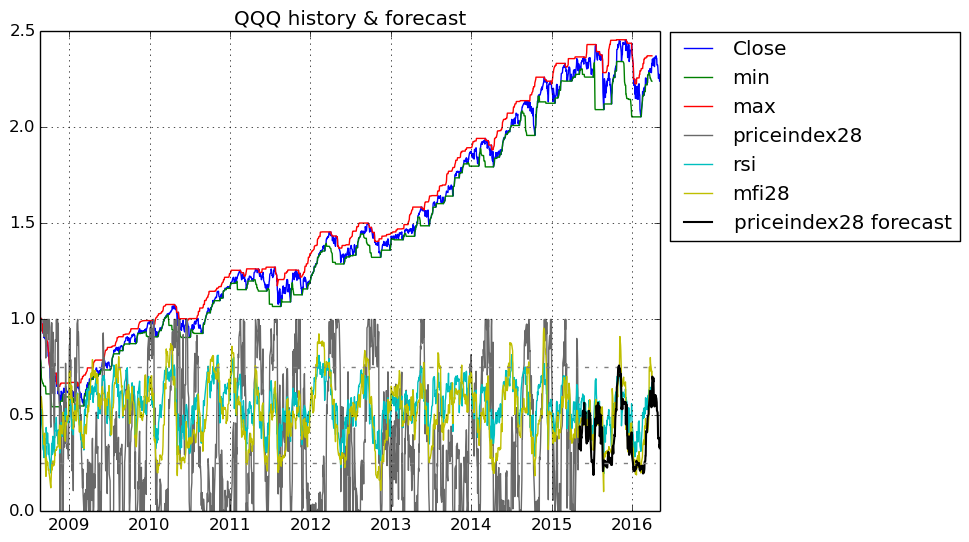

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [47]:
plot(withoutlabel.timestamp,withoutlabel.values[:,closeidx]./initvalue)
plot(withlabel.timestamp,withlabel.values[:,closeidx+1:closeidx+2]./initvalue)
plot(training.timestamp,training.values[:,pricerangeidx],c="DimGrey")
plot(withlabel.timestamp,withlabel.values[:,rsiidx],c="c")
plot(withlabel.timestamp,withlabel.values[:,mfiidx],c="y")
plot(newfeatures.timestamp,newlabels,c="k",linewidth=1.5)
title("$symbol history & forecast")
grid("on")
axhline(y=0.25,ls="-.",c="Grey")
axhline(y=0.75,ls="-.",c="Grey")
legend([withlabel.colnames[[closeidx,closeidx+1,closeidx+2,pricerangeidx,rsiidx,mfiidx]];"priceindex$rangelength forecast"],bbox_to_anchor=(1.5, 1.02))

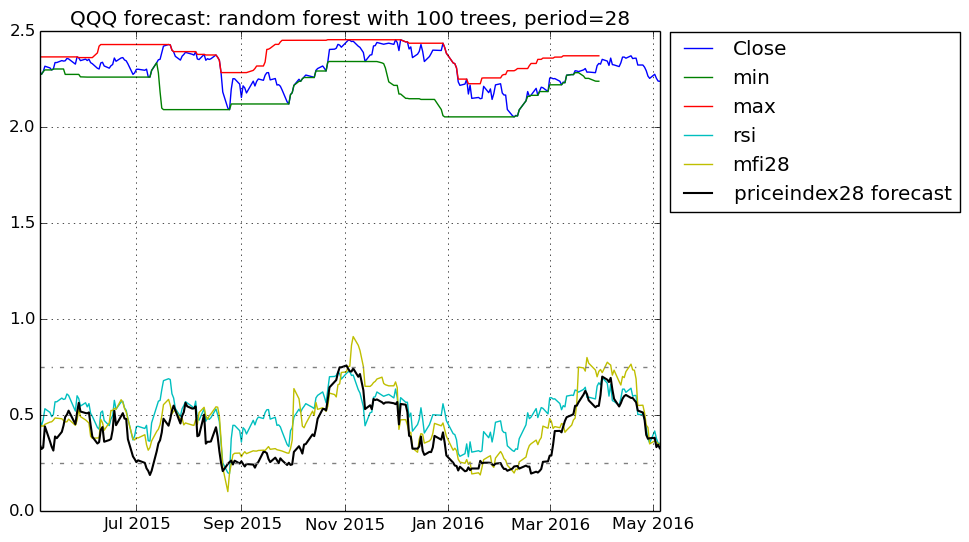

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [48]:
plot(newfeatures.timestamp,newfeatures.values[:,closeidx]./initvalue)
plot(test.timestamp,test.values[:,closeidx+1:closeidx+2]./initvalue)
plot(newfeatures.timestamp,newfeatures.values[:,rsiidx],c="c")
plot(newfeatures.timestamp,newfeatures.values[:,mfiidx],c="y")
plot(newfeatures.timestamp,newlabels,c="k",linewidth=1.5)
legend([test.colnames[[closeidx,closeidx+1,closeidx+2,rsiidx,mfiidx]];"priceindex$rangelength forecast"],bbox_to_anchor=(1.5, 1.02))
title("$symbol forecast: random forest with $ntrees trees, period=$rangelength")
grid("on")
# color names http://astropython.blogspot.ie/2012/02/additional-color-names-for-matplotlib.html
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axhline
axhline(y=0.25,ls="-.",c="Grey")
axhline(y=0.75,ls="-.",c="Grey")

In [49]:
features=withlabel.values[:,1:closeidx]
labels=convert(Array{Float64,1},withlabel.values[:,pricerangeidx])
# run n-fold cross validation on regression forest
# using 2 random features, 10 trees, 3 folds, averaging of 5 samples/leaf (optional),
# and 0.7 porition of samples per tree (optional)
# returns array of coefficients of determination (R^2)
r2 = nfoldCV_forest(labels, features, 2, ntrees, 3, 5, 0.7)


Fold 1
Mean Squared Error:     0.035782284743962625
Correlation Coeff:      0.9012970254510736
Coeff of Determination: 0.7064563724722084

Fold 2
Mean Squared Error:     0.029660169369729494
Correlation Coeff:      0.9082789864229112
Coeff of Determination: 0.7362693809279154

Fold 3

3-element Array{Float64,1}:
 0.706456
 0.736269
 0.731425


Mean Squared Error:     0.03201644665648319
Correlation Coeff:      0.900542762558105
Coeff of Determination: 0.731425297197309

Mean Coeff of Determination: 0.724717016865811
